In [1]:
import numpy as np
from astropy import units as u
from astropy import coordinates
from astropy.coordinates import EarthLocation
from astroplan import Observer
import pytz
import datetime
from astropy.time import Time, TimeDelta
from astropy import visualization
import pylab as plt
from astroplan.plots import plot_airmass 
from astroplan.plots import plot_sky
from astroplan import download_IERS_A
download_IERS_A()

In [2]:
visualization.quantity_support() 
plt.style.use('dark_background')

In [3]:
home_site = coordinates.EarthLocation.from_geodetic(lon=-82.382937*u.deg, lat=29.654859*u.deg, height=21*u.m)
observer = Observer(location=coordinates.EarthLocation(lat=29.654859*u.deg, lon=-82.382937*u.deg, height=21*u.m),
               timezone='EST',
               name='Home Site Observatory',
              )
home_site, observer

(<EarthLocation (735303.92104121, -5498355.53536461, 3137193.68585329) m>,
 <Observer: name='Home Site Observatory',
     location (lon, lat, el)=(-82.382937 deg, 29.654859000000002 deg, 21.00000000082474 m),
     timezone=<StaticTzInfo 'EST'>>)

In [4]:
def eastern(time):
    est = time.to_datetime(timezone=observer.timezone)
    
    return est.strftime('%H:%M:%S')

In [5]:
def altaz_plots(glon, glat=0, month='September', day='16', time='9:30:00 AM'):
    time = datetime.datetime.strptime(f'{month} {day}, 2020 {time}', "%B %d, %Y %I:%M:%S %p",)
    atime = Time(time)
    atimes = atime + TimeDelta(1*u.h) * np.arange(24)
    
    target = coordinates.SkyCoord(glon*u.deg, glat*u.deg, frame='galactic')
    altaz = observer.altaz(atimes, target=target)
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1).plot_date(atimes.plot_date, altaz.alt)
    plt.xticks(rotation=45)
    plt.ylabel("Altitude (deg)")
    plt.subplot(1,2,2).plot_date(atimes.plot_date, altaz.az)
    plt.xticks(rotation=45)
    plt.ylabel("Azimuth (deg)")

In [6]:
def observing_times(month='September', day='16', time='9:30:00 AM'):
    time = datetime.datetime.strptime(f'{month} {day}, 2020 {time}', "%B %d, %Y %I:%M:%S %p",)
    atime = Time(time)
    atimes = atime + TimeDelta(1*u.h) * np.arange(24)
    
    right = []
    left = []
    
    for glon in range(30,120):
        for ii in range(24):
            target = coordinates.SkyCoord(glon*u.deg, 0*u.deg, frame='galactic')
            altaz = observer.altaz(atimes, target=target)
            
            if altaz[ii].alt >= 70*u.deg: 
                if altaz[ii].az <= 20*u.deg or altaz[ii].az >= 290*u.deg:
                    right.append((glon*u.deg, atimes[ii].value))

                elif 220*u.deg <= altaz[ii].az <= 290*u.deg:
                    left.append((glon*u.deg, atimes[ii].value))

            elif 70*u.deg > altaz[ii].alt >= 60*u.deg:
                if altaz[ii].az <= 20*u.deg or altaz[ii].az >= 290*u.deg:
                    right.append((glon*u.deg, atimes[ii].value))
        
    return right, left

In [7]:
day1 = Time("2020-09-16")
day2 = Time("2020-09-17")

In [8]:
(eastern(observer.sun_set_time(day1)), eastern(observer.sun_rise_time(day1)))

('18:30:12', '06:18:50')

In [9]:
(eastern(observer.sun_set_time(day2)), eastern(observer.sun_rise_time(day2)))

('18:28:58', '06:19:21')

In [10]:
dawn1 = eastern(observer.twilight_morning_astronomical(time=day1,which="nearest",n_grid_points=150))
dusk1 = eastern(observer.twilight_evening_astronomical(time=day1,which="nearest",n_grid_points=150))
dawn1, dusk1

('04:54:59', '19:53:58')

In [11]:
dawn2 = eastern(observer.twilight_morning_astronomical(time=day2,which="nearest",n_grid_points=150))
dusk2 = eastern(observer.twilight_evening_astronomical(time=day2,which="nearest",n_grid_points=150))
dawn2, dusk2

('04:55:37', '19:52:38')

In [12]:
sideral1 = observer.local_sidereal_time(time=day1, kind='apparent', model=None)
sideral2 = observer.local_sidereal_time(time=day2, kind='apparent', model=None)
sideral1, sideral2

(<Longitude 18.20110166 hourangle>, <Longitude 18.26680957 hourangle>)

In [13]:
observer.moon_phase(time=day1), observer.moon_phase(time=day2)

(<Quantity 2.77741577 rad>, <Quantity 2.99926393 rad>)

In [14]:
rise1 = eastern(observer.moon_rise_time(time=day1, which='nearest', n_grid_points=150))
rise2 = eastern(observer.moon_rise_time(time=day2, which='nearest', n_grid_points=150))
set1 = eastern(observer.moon_set_time(time=day1, which='nearest', n_grid_points=150))
set2 = eastern(observer.moon_set_time(time=day2, which='nearest', n_grid_points=150))
rise1, rise2, set1, set2

('05:14:04', '06:22:30', '17:42:56', '18:23:46')

In [15]:
right, left = observing_times()

In [16]:
targets = []
longs = [65, 75, 85, 95]
for ii in longs:
    target = coordinates.SkyCoord(ii*u.deg, 0*u.deg, frame='galactic')
    targets.append(target)

In [17]:
rise_and_set = []
for target in targets:
    temp_dict = {}
    temp_dict['target'] = target
    temp_dict['rise time day 1'] = eastern(observer.target_rise_time(time=day1, target=target))
    temp_dict['rise time day 2'] = eastern(observer.target_rise_time(time=day2, target=target))
    temp_dict['set time day 1'] = eastern(observer.target_set_time(time=day1, target=target))
    temp_dict['set time day 2'] = eastern(observer.target_set_time(time=day2, target=target))
    rise_and_set.append(temp_dict)

In [45]:
rise_and_set

[{'target': <SkyCoord (Galactic): (l, b) in deg
      (65., 0.)>,
  'rise time day 1': '13:33:35',
  'rise time day 2': '13:29:40',
  'set time day 1': '03:53:48',
  'set time day 2': '03:49:52'},
 {'target': <SkyCoord (Galactic): (l, b) in deg
      (75., 0.)>,
  'rise time day 1': '13:30:10',
  'rise time day 2': '13:26:14',
  'set time day 1': '04:48:22',
  'set time day 2': '04:44:27'},
 {'target': <SkyCoord (Galactic): (l, b) in deg
      (85., 0.)>,
  'rise time day 1': '13:25:19',
  'rise time day 2': '13:21:25',
  'set time day 1': '05:56:37',
  'set time day 2': '05:52:43'},
 {'target': <SkyCoord (Galactic): (l, b) in deg
      (95., 0.)>,
  'rise time day 1': '13:17:12',
  'rise time day 2': '13:13:18',
  'set time day 1': '07:31:22',
  'set time day 2': '07:27:27'}]

In [18]:
transit_time1 = []
transit_time2 = []
for target in targets:
    time1 = observer.target_meridian_transit_time(day1, target, which='nearest', 
                                              grid_times_targets=False, n_grid_points=150)
    time2 = observer.target_meridian_transit_time(day2, target, which='nearest', 
                                              grid_times_targets=False, n_grid_points=150)
    est1 = eastern(time1)
    est2 = eastern(time2)
    
    transit_time1.append(est1)
    transit_time2.append(est2)

In [46]:
transit_time1

['20:44:07', '21:09:15', '21:40:59', '22:22:20']

In [52]:
plot_time1 = []
plot_time2 = []
sunset1 = observer.sun_set_time(day1)
sunset2 = observer.sun_set_time(day2)
for ii in range(2,9):
    time1 = sunset1 + ii*u.hour
    time2 = sunset2 + ii*u.hour
    plot_time1.append(time1)
    plot_time2.append(time2)

In [53]:
eastern(plot_time1[0])

'20:30:12'

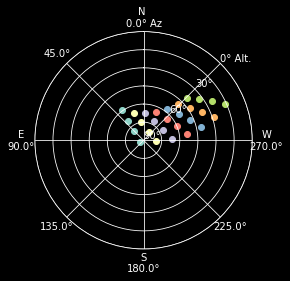

In [54]:
for time in plot_time1:
    plot_sky(target=targets, observer=observer, time=time)

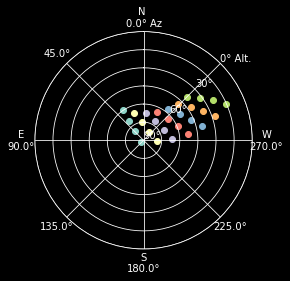

In [55]:
for time in plot_time2:
    plot_sky(target=targets, observer=observer, time=time)

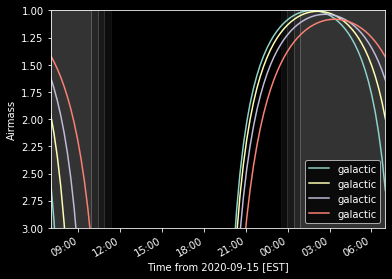

In [24]:
plot_airmass(targets,
             observer=observer,
             time=day1.to_datetime(timezone=observer.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

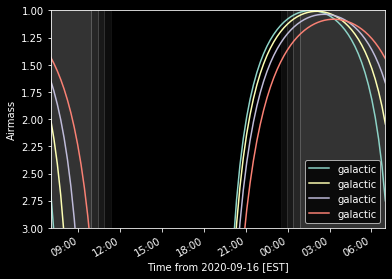

In [25]:
plot_airmass(targets,
             observer=observer,
             time=day2.to_datetime(timezone=observer.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

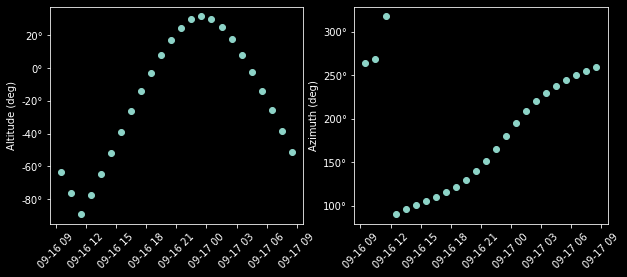

In [5]:
altaz_plots(0)

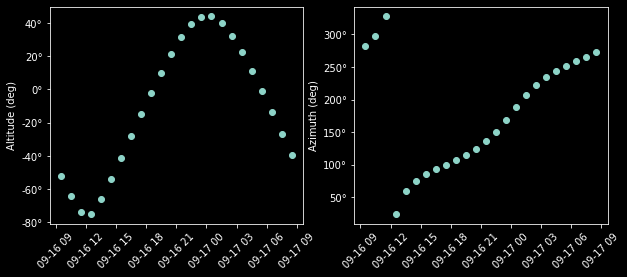

In [6]:
altaz_plots(15)

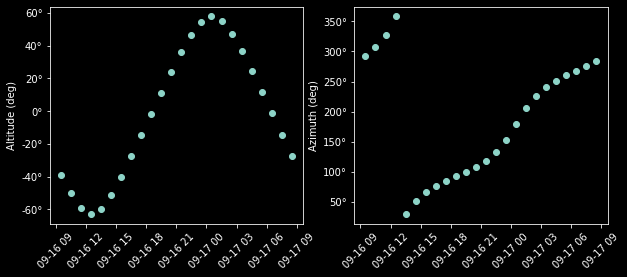

In [7]:
altaz_plots(30)

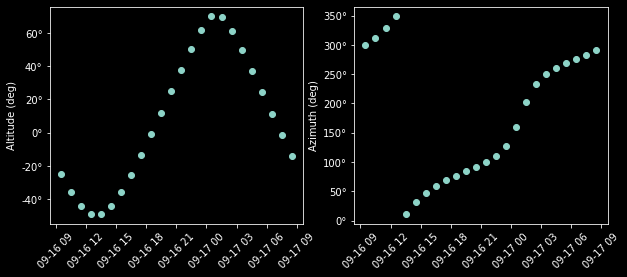

In [8]:
altaz_plots(45)

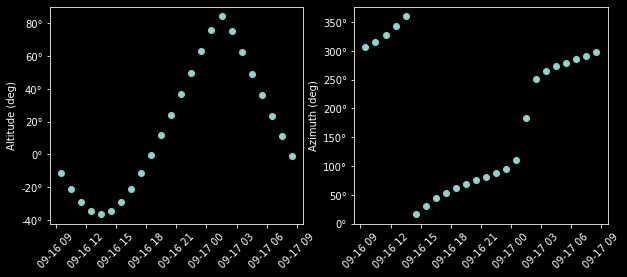

In [9]:
altaz_plots(60)

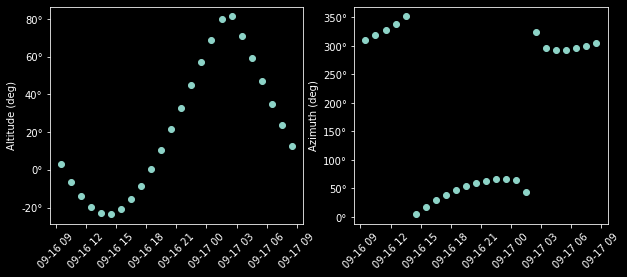

In [10]:
altaz_plots(75)

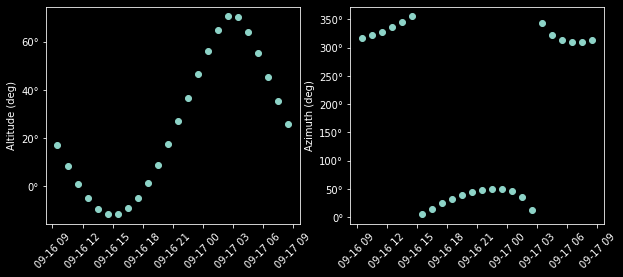

In [11]:
altaz_plots(90)

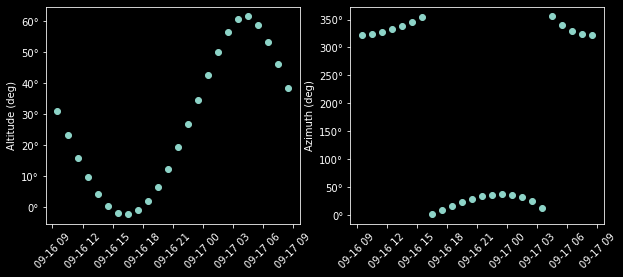

In [12]:
altaz_plots(105)

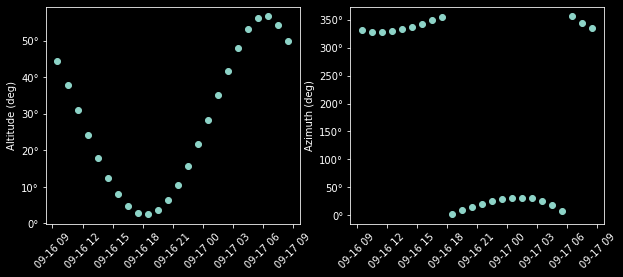

In [13]:
altaz_plots(120)

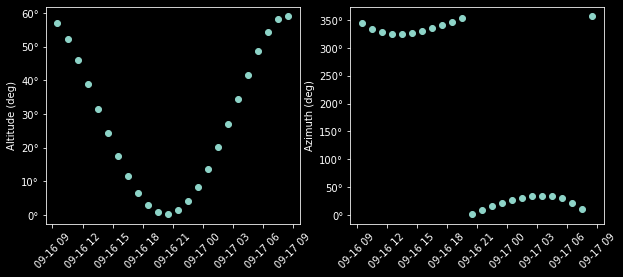

In [14]:
altaz_plots(135)

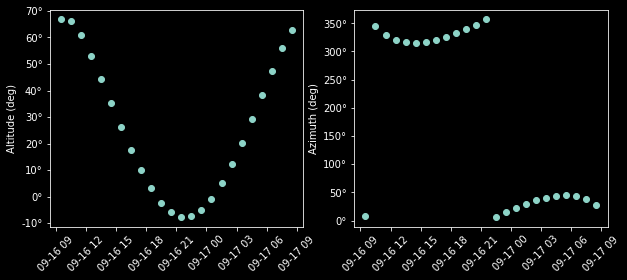

In [15]:
altaz_plots(150)

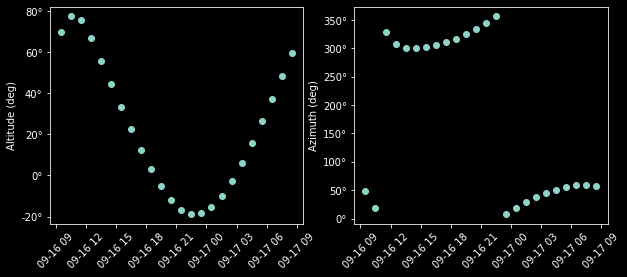

In [16]:
altaz_plots(165)

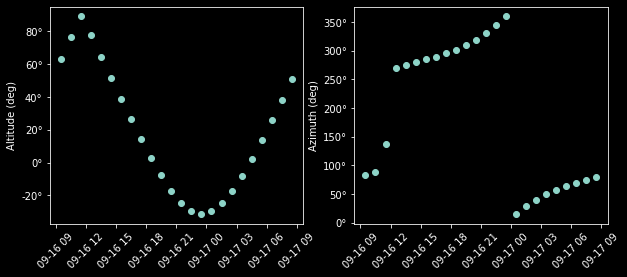

In [17]:
altaz_plots(180)

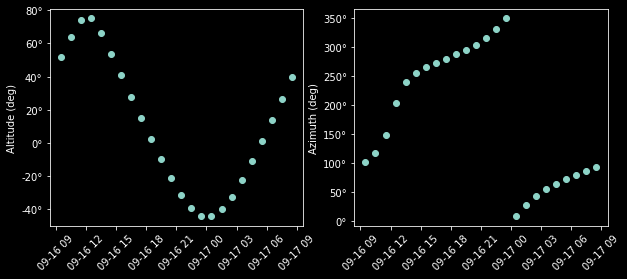

In [18]:
altaz_plots(195)

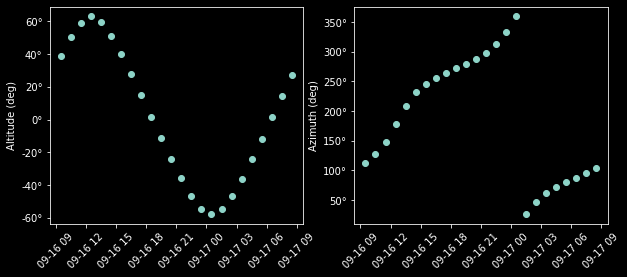

In [19]:
altaz_plots(210)

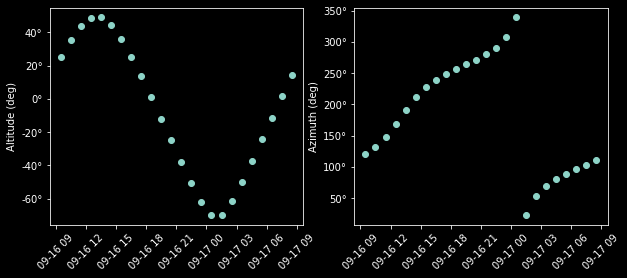

In [20]:
altaz_plots(225)

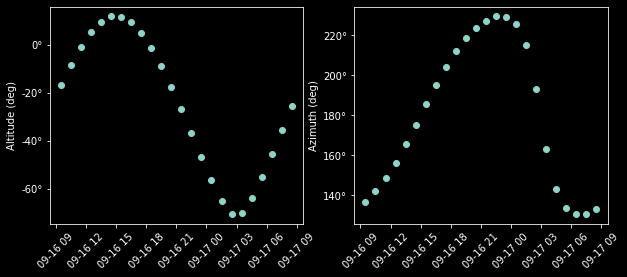

In [21]:
altaz_plots(270)

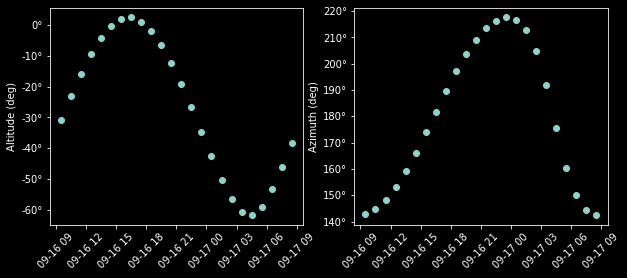

In [22]:
altaz_plots(285)

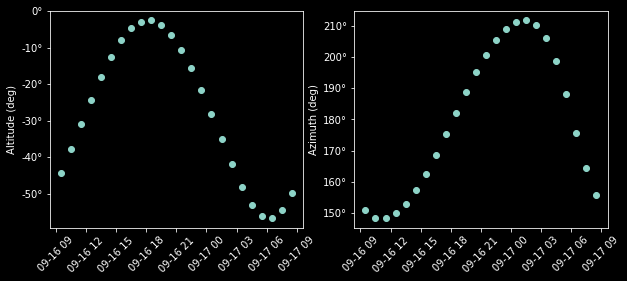

In [23]:
altaz_plots(300)

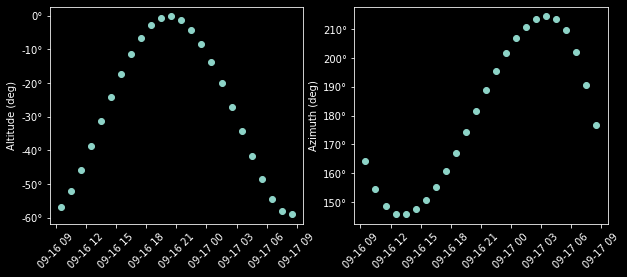

In [24]:
altaz_plots(315)

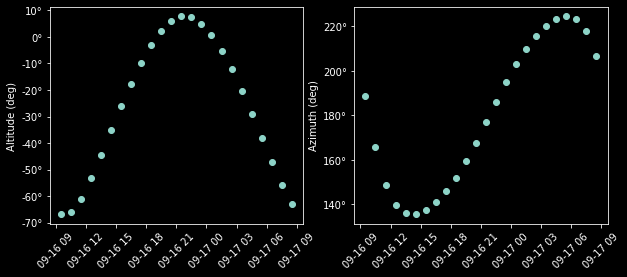

In [25]:
altaz_plots(330)

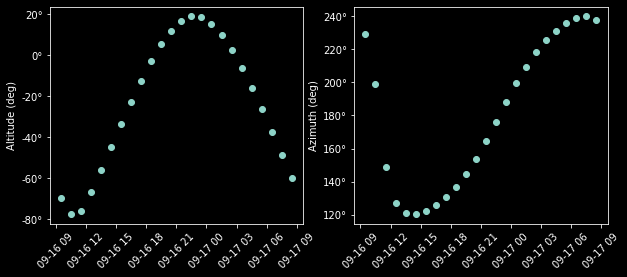

In [26]:
altaz_plots(345)